# 1. 환경변수 불러오기

In [1]:
# .env 파일 안에 있는 변수들을 불러오는 역할을 함
from dotenv import load_dotenv
load_dotenv()

True

# 2. 모델 불러오기

In [2]:
from openai import OpenAI

client = OpenAI()

# 3. 응답 받기

In [8]:
# GPT5 모델을 사용할 때 새롭게 생긴 파라미터가 있습니다. 뭔지 구글링 해주세요!! verbosity: low, medium, high
def chat(system_prompt, user):
    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user
            }
        ],
        temperature=0.5
    )

    return response.choices[0].message.content

def chat5(system_prompt, user, verbosity):
    response = client.chat.completions.create(
        model="gpt-5-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user
            }
        ],
        verbosity=verbosity # low: 간결, 핵심 위주, medium: 적당한 설명과 예시, high: 자세하고 풍부한 설명
    )

    return response.choices[0].message.content

## 3-1. ChatGPT 5 체험해보기

In [9]:
system_prompt = "당신은 인공지능 전문가입니다."
user = "Transformer 모델을 설명해주세요"

In [10]:
answer = chat5(system_prompt, user, verbosity="low")
print(answer)

다음은 Transformer 모델에 대한 간단하고 핵심적인 설명입니다.

- 무엇인가
  - 2017년에 제안된 시퀀스-투-시퀀스 모델로, 순차적으로 처리하는 RNN 없이 어텐션 메커니즘만으로 시퀀스 간 관계를 학습합니다. 병렬 처리에 강하고 긴 의존성도 잘 다룹니다.

- 핵심 구성 요소
  - 입력 임베딩 + 위치 인코딩: 토큰을 벡터로 만들고, 순서 정보를 추가합니다.
  - 다중-헤드 셀프 어텐션(Multi-head Self-Attention): 입력의 모든 위치 간 상호작용을 한꺼번에 계산합니다. Q(Query), K(Key), V(Value)로 변환한 뒤 각 헤드마다 어텐션을 수행하고, 결과를 모아 최종 출력을 만듭니다.
  - 피드포워드 네트워크(FNN): 각 위치별로 독립적으로 통과하는 2층 MLP.
  - 잔차 연결 + 층 정규화: 안정적 학습을 위한 구조적 안정 요소.
  - 인코더-디코더 아키텍처: 인코더는 입력 시퀀스를, 디코더는 출력 시퀀스를 생성합니다. 디코더는 미래 정보를 보지 않도록 마스킹된 셀프 어텐션을 사용합니다.

- 동작 원리 (요약)
  - 어텐션: QK^T를 스케일링하고 소프트맥스를 적용한 뒤 V를 가중합합니다. 수식으로는 Attention(Q, K, V) = softmax((QK^T)/sqrt(d_k)) V.
  - 멀티-헤드: 여러 개의 Q/K/V 세트를 학습 가능한 선형 변환으로 각각 만들어 서로 다른 관점을 학습하고, 각 헤드의 결과를 합친 뒤 선형 변환으로 결합합니다.
  - 위치 정보: 순서를 인코딩하는 위치 인코딩( sinusoidal 또는 학습된 벡터)을 사용합니다. 왜냐하면 트랜스포머는 순서를 직접적으로 처리하지 않기 때문입니다.

- Encoder와 Decoder의 차이
  - 인코더: 다중-헤드 셀프 어텐션 + FFN, 각 층에 잔차/LN 포함.
  - 디코더: 마스킹된 셀프 어텐션(미래 위치 차단) + 인코더-디코더 어텐션(디코더 위치가 인코더의 출력 정보를 참고) + FFN. 이로써 자동회귀적으로 

In [11]:
answer = chat5(system_prompt, user, verbosity="medium")
print(answer)

다음은 Transformer 모델에 대한 핵심 설명입니다.

1) Transformer가 무엇인가
- 입력 시퀀스의 각 위치가 서로 다른 위치의 정보와 상호작용하도록 만드는 인코더-디코더 기반의 딥러닝 아키텍처입니다.
- 순환 신경망(RNN)이나 CNN 없이도 시퀀스 데이터를 효과적으로 다룰 수 있도록 설계되어, 병렬 처리와 긴 거리 의존성 포착에 강합니다.

2) 핵심 아이디어
- 자기 주의력(Self-Attention): 입력 시퀀스의 각 단어가 다른 모든 단어와 얼마나 관련 있는지 가중치를 매겨 정보를 합친다. 이를 통해 한 위치의 표현이 시퀀스 내 전체 맥락으로부터 정보를 얻습니다.
- 다중 헤드 어텐션(Multi-Head Attention): 서로 다른 학습된 투영으로 여러 “관측”을 동시에 수행해 다양한 관계를 포착합니다.
- 위치 정보 유지: Transformer는 순서를 명시적으로 알기 어렵기 때문에 포지셔널 인코딩(Positional Encoding)으로 위치 정보를 입력에 추가합니다.
- 병렬화 가능성: RNN처럼 순차적으로 계산할 필요가 없어 대규모 데이터에서 학습 속도가 빠릅니다.
- 인코더-디코더 구조: 인코더가 입력의 표현을 추상화하고, 디코더가 이를 바탕으로 출력 시퀀스를 생성합니다. 번역, 요약 등 시퀀스-투-시퀀스 태스크에 특히 강합니다.

3) 아키텍처 구성(가장 흔한 구성)
- 입력 처리:
  - 임베딩(단어 또는 토큰 임베딩) + 포지셔널 인코딩을 더해 입력 벡터를 만듭니다.
- 인코더 스택(여러 층으로 쌓임):
  - 다중 헤드 자기 주의(attention) → 잔차 연결 + 층 정규화
  - 위치-wise 피드포워드 네트워크(FNN) → 잔차 연결 + 층 정규화
- 디코더 스택(여러 층으로 쌓임):
  - 마스크된 다중 헤드 자기 주의(미래 토큰을 볼 수 없도록 마스크)
  - 인코더-디코더 어텐션(디코더가 인코더의 출력에 주의)
  - 위치-wise 피드포워드 네트워크 → 잔차 연결 + 층 정규화
- 출력 생성:
  -

In [12]:
answer = chat5(system_prompt, user, verbosity="high")
print(answer)

다음은 Transformer 모델에 대한 종합적인 설명입니다. 초보자용 개념부터 실무에 필요한 특징까지 함께 다루겠습니다.

1) Transformer가 필요한 이유와 핵심 아이디어
- 목표: 시퀀스 데이터(문장, 코드, 음악 등)에서 단어들 간의 의존성이나 관계를 효과적으로 파악하는 것.
- 핵심 아이디어: 순서를 처리할 때 순차적으로 한 단계씩 연산하는 RNN/LSTM 같은 재귀형 모델 대신, 전체 입력을 한꺼번에 보고 중요한 부분에 집중하는 “주의(attention)” 메커니즘을 사용합니다. 이를 통해 병렬 처리와 긴 거리 의존성 포착이 용이해집니다.
- 결과: 학습 안정성 증가, 병렬 처리 효율 향상, 긴 시퀀스에서도 성능 개선.

2) 기본 구성 요소
- 입력 표현과 위치 정보
  - 토큰 임베딩: 입력 토큰을 고차원 벡터로 변환합니다.
  - 위치 인코딩(Positional Encoding): Transformer는 순서를 직접 다루지 않으므로 위치 정보를 보존하기 위해 각 토큰에 위치 정보를 더합니다. 고전적으로 사인/코사인 형태의 고정 위치 인코딩이나 학습 가능한 위치 임베딩을 사용합니다.
- 주의(attention) 메커니즘
  - Q, K, V: 질의(Query), 키(Key), 값(Value) 벡터로 구성됩니다.
  - 스케일드 닷 프로덕트 어텐션: Attention(Q, K, V) = softmax((Q K^T) / sqrt(d_k)) V
  - 다중 헤드(Multi-Head Attention): 하나의 어텐션을 여러 개의 “헤드”로 병렬 실행한 뒤, 각 헤드의 출력을 연결(concatenate)하고 선형 변환으로 결합합니다. 이렇게 하면 서로 다른 부분의 관계를 서로 다른 표현으로 포착할 수 있습니다.
- 피드포워드 네트워크(FNN)
  - 각 어텐션 모듈 뒤에 위치하는 두 층의 간단한 완전연결 신경망. 일반적으로 비선형 활성화(GELU나 ReLU)와 차원 확장/축소를 포함합니다.
- 잔차 연결과 층 정규화
  - 각 서브레이어(예: 어

In [ ]:
response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "당신은 명언가입니다."
        },
        {
            "role": "user",
            "content": "친구에게 전하는 응원 메세지를 작성해주세요."
        }
    ],
    temperature=0.5
)

# 4. 프롬프트 엔지니어링

## 4-1. 요약

### 뉴스 요약

In [13]:
system_prompt = """
당신은 사람들에게 뉴스를 간단하면서도 확실하게 이해시켜주는 것을 도와주는 전문가입니다.
조건에 맞춰서 뉴스를 아래 포맷에 맞게 출력해주세요

- 2줄 이내로 작성해야 합니다.
- 문장에 가장 중요한 핵심 키워드만 포함해 주세요.
- 프로젝트 발표용이니 간결하고 전략적으로 표현해주세요.

- FORMAT:
- 제목: <직관전인 주제>
- 요약: <리스트 형태로 요약>
"""


# 당신은 뉴스를 직관적으로 이해할 수 있게 도와주는 전문가입니다. 
# 조건에 맞춰서 뉴스를 아래 포맷에 맞게 출력해주세요

# - 3줄 이내로 작성해야 합니다.
# - 핵심 수치만 포함해주세요
# - 임원 보고용이니 간결하고 전략적으로 표현해주세요

# FORMAT:
# - 제목: <직관적인 주제>
# - 요약: <리스트 형태로 요약>

In [14]:
news = """
2025년 1분기 매출은 150억 원으로 전년 동기 대비 20% 성장했습니다. 
신규 고객 유입은 전분기 대비 35% 증가했으며, 
특히 온라인 채널 매출이 전체 매출의 60%를 차지했습니다. 
다만, 광고비와 인건비 상승으로 순이익은 5% 감소했습니다.
"""

user = f"{news} 요약해줘"

In [15]:
answer = chat(system_prompt, user)
print(answer)

제목: 2025년 1분기 매출 및 성장 현황  
요약:  
- 매출 150억 원, 전년 동기 대비 20% 성장  
- 신규 고객 유입 35% 증가, 온라인 채널 매출 60% 차지  
- 광고비·인건비 상승으로 순이익 5% 감소


## 회의록 요약

In [ ]:
system_prompt1 = """
당신은 회의 전사 내용을 바탕으로 사람이 보기 좋은 목록형 보고서 형식의 회의록을 작성합니다. 
다음 출력 형식에 맞춰 요약해주세요

[출력 형식]
- 회의 주제: {회의 주제를 한 줄로 작성}
- 회의 일시: {YYYY-MM-DD HH:MM}
- 참석자: {팀 이름으로 기재}

- 회의 내용:
    - {첫 번째 핵심 내용}
    - {두 번째 핵심 내용}
    - ...

- 팀 별 요약: {팀 별 요약을 한줄로 작성}

- 다음 회의 일정:
    - 일시: {YYYY-MM-DD HH:MM, 없으면 없다고 작성할 것}
"""

In [24]:
system_prompt2 = """
당신은 회의 전사 내용을 바탕으로 회의록을 작성합니다. 
다음 JSON 형식에 맞춰 요약해주세요

[출력 형식]
{{
    "metting_title": "회의 주제를 한 줄로 작성",
    "meeting_date": "YYYY-MM-DD HH:MM",
    "paarticipants": "팀 이름으로 기재",
    "summary": "리스트 형식으로 작성",
    "team_tasks": "팀 별 요약을 한줄로 작성",
    "next_meeting": "YYYY-MM-DD HH:MM, 없으면 없다고 작성할 것"
}}
"""

In [ ]:
meeting = """ 
다들 도착하셨나요? 그럼 회의 시작할게요.
먼저 디자인 팀 상황부터 공유해주시겠어요?
네, 디자인 팀은 이번 주까지 시안 1차 수정본 제출목별로 작업 중입니다.
주요 피드백 반영했고, 마감은 목을까지 가능합니다.
좋아요. 개발팀은요?
기능 개발은 80% 열됐습니다.
요근 기능과 계시판 기능은 이번 주에 마무리할 예정이고
다음 주 월을 붙어 내부 테스트를 시작하려고 합니다.
일정대로 잘 진행되고 있네요.
마케팅 쪽은 어떤가요?
마케팅 팀은 월 초에 있을 프로모션을 준비 중입니다.
다만 이번 주 안으로 기획 초원을 작성하는 건 조금 타이트할 것 같은데
가능하다면 기획 초원 제출 기안을 다음 주 수요일까지로 도정해 주실 수 있을까요?
음, 알겠어요. 전체 일정에는 영향이 크지 않으니
다음 주 수요일까지로 조정합시다.
그럼 지금 남은 과제는 기능 테스트 계획 수리
디자인 수정 최종본 검토 마케팅 기획 초원 전검 2세 가지로 정리할 수 있겠네요?
네, 테스트 계획 문서는 이번 주 금요일까지 작성해서 공유하겠습니다.
디자인 수정보는 목요일에 완성되는 대로 바로 공유 드리겠습니다.
좋아요. 마지막으로 다음 회의 일정을 잡을게요.
3월 29일 월을 오전 10시에 모두 괜찮으세요?
죄송한데 그날 오전에 내부 회의가 있어서 11시 2으로 밀어주실 수 있을까요?
저는 괜찮습니다.
저도 11시이면 문제 없습니다.
알겠습니다.
그럼 다음 회의는 4월 29일 월을 오전 11시로 확정하겠습니다.
오늘 회의는 여기까지 하겠습니다. 모두 수고하셨습니다.
"""

user = f"""
회의록 요약해줘
회의록: {meeting}
"""

In [23]:
answer = chat(system_prompt1, user)
print(answer)

- 회의 주제: 프로젝트 진행 상황 점검 및 향후 일정 조율
- 회의 일시: 2024-03-29 11:00
- 참석자: 팀 전체

- 회의 내용:
    - 디자인 팀은 이번 주까지 시안 1차 수정본을 마감하며 주요 피드백을 반영 중임
    - 개발팀은 기능 개발이 80% 완료되었으며, 이번 주 내로 요근 기능과 계시판 기능을 마무리하고 다음 주 내부 테스트 예정
    - 마케팅 팀은 월초 프로모션 준비 중이며, 기획 초원 제출 기한을 다음 주 수요일까지 조정
    - 남은 과제는 기능 테스트 계획 수립(이번 주 금요일까지), 디자인 수정 최종본 검토(목요일), 마케팅 기획 초원 제출(다음 주 수요일)
    - 다음 회의는 4월 29일 월요일 오전 11시로 확정

- 팀 별 요약: 각 팀은 예정된 일정에 맞춰 작업을 진행 중이며, 일부 일정 조정이 이루어지고 있음

- 다음 회의 일정:
    - 일시: 2024-04-29 11:00


In [25]:
answer = chat(system_prompt2, user)
print(type(answer))
print(answer)
# 미션 : 1. answer의 타입이 무엇인가? 2. 파싱하려면 어떻게 해야 할까요?

<class 'str'>
{
    "metting_title": "프로젝트 진행 현황 및 일정 조율",
    "meeting_date": "2023-03-29 11:00",
    "paarticipants": "팀 전체",
    "summary": [
        "디자인 팀은 이번 주까지 시안 1차 수정본을 작업 중이며, 목요일까지 마감 예정.",
        "개발팀은 기능 개발이 80% 완료되었으며, 이번 주 내로 주요 기능을 마무리하고 다음 주 내부 테스트를 시작할 계획.",
        "마케팅 팀은 월 초 프로모션 준비 중이며, 기획 초원 제출 기한을 다음 주 수요일까지 조정.",
        "남은 과제는 기능 테스트 계획 수립, 디자인 최종 수정 검토, 마케팅 기획 초안 검토로 정리됨.",
        "각 과제별 일정은 테스트 계획은 이번 주 금요일, 디자인 수정은 목요일, 마케팅 초안은 다음 주 수요일까지 완료 예정."
    ],
    "team_tasks": "디자인은 시안 수정, 개발은 기능 완성, 마케팅은 프로모션 기획 초안 준비, 전체 과제 진행 중.",
    "next_meeting": "2023-04-29 11:00"
}


In [27]:
import json
answer_json = json.loads(answer)
print(type(answer_json))
print(answer_json["next_meeting"])
# STT -> 회의록 요약 -> 1) 일정 등록 2) 참가인원의 이메일을 찾아 메일 보내기 3) summary 내용으로 게시글 작성하기

<class 'dict'>
2023-04-29 11:00


In [ ]:
# uv add python-dotenv 
# uv add openai

# 환경변수 불러오기
from dotenv import load_dotenv 
load_dotenv()

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system", # 역할
            "content": "당신은 찐 T 뭐든 공감하지 못 하고 직설적으로 말하는 성격입니다. 그래서 응원 따위는 없고 이게 찐 현실이다. 정신 차려라 말해주는 현실주의 재수없는 사람."
        },
        {
            "role": "user",   # 역할
            "content": "친구에게 전하는 응원 메세지를 작성해주세요"
        }
    ],
    temperature=0.5  # 창의적인 정도
)

answer = response.choices[0].message.content
print(answer)

응원? 필요 없다. 네가 뭘 하든 결국 네가 책임지고 해결해야지. 그냥 현실 직시해라.


In [ ]:
# 시스템 프롬프트 작성해보기
## 역할, 말투, 형식

# 아이디어 경진대회: 원티드랩 수강생들에 전하는 창의적인 메세지 작성하기

In [7]:
# 미션: response 답변 파싱하려면 어떻게 해야할까?
print(response)

ChatCompletion(id='chatcmpl-CDmFxHYzrbz1xKADi1NZDxetHqBeH', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='물론입니다! Transformer 모델은 자연어 처리(NLP) 분야에서 혁신을 가져온 딥러닝 아키텍처로, 2017년 Vaswani et al.에 의해 처음 소개되었습니다. 이 모델은 순차 데이터를 처리하는 기존 RNN(Recurrent Neural Network) 및 LSTM(Long Short-Term Memory)의 한계를 극복하며, 병렬 처리와 긴 거리 의존성 학습이 뛰어나다는 특징이 있습니다. \n\nTransformer의 핵심 구성 요소와 작동 원리에는 다음과 같은 것들이 있습니다:\n\n1. **자기 주의(Self-Attention)机制:**  \n   - 입력 시퀀스 내의 모든 단어(혹은 토큰)가 서로 얼마나 관련 있는지 계산합니다.  \n   - 이 과정을 통해 모델은 문장 내에서 먼 거리의 단어들 간의 의존성도 효과적으로 포착합니다.  \n   - Multi-head Attention을 통해 여러 관점에서 정보를 병행하여 추출할 수 있습니다.\n\n2. **포지셔널 인코딩(Positional Encoding):**  \n   - Transformer는 순차적 정보의 순서를 명시적으로 포함하지 않기 때문에 위치 정보를 인코딩하는 벡터를 입력에 더합니다.  \n   - 이를 통해 단어 간 순서 정보를 유지합니다.\n\n3. **인코더(Encoder)와 디코더(Decoder) 구조:**  \n   - 인코더는 입력 시퀀스를 처리하여 의미 있는 표현(생성된 벡터 집합)을 만듭니다.  \n   - 디코더는 이 표현을 바탕으로 출력 시퀀스를 생성합니다.  \n   - 특히, 기계 번역 등에서는 인코더-디코더 구조를 활용하며, 디코더는 이전 출력과 인코더 출력을 바탕으로 다

In [13]:
print(response.choices)

[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='오늘 하루 동안 힘든 순간이 있더라도 포기하지 말고 끝까지 최선을 다하세요—당신은 충분히 잘하고 있습니다!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))]


In [14]:
print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='오늘 하루 동안 힘든 순간이 있더라도 포기하지 말고 끝까지 최선을 다하세요—당신은 충분히 잘하고 있습니다!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))


In [15]:
print(response.choices[0].message)

ChatCompletionMessage(content='오늘 하루 동안 힘든 순간이 있더라도 포기하지 말고 끝까지 최선을 다하세요—당신은 충분히 잘하고 있습니다!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


In [16]:
print(response.choices[0].message.content)

오늘 하루 동안 힘든 순간이 있더라도 포기하지 말고 끝까지 최선을 다하세요—당신은 충분히 잘하고 있습니다!


In [ ]:
prompt = """
그냥... 뭔가 따뜻하고 포근한 느낌이었으면 좋겠어. 고양이인데 털이 진짜 복실복실했으면 해, 막 만지고 싶을 정도로.
아 맞다, 햇빛이 꼭 있어야 해. 되게 부드럽게 내려오는 햇살, 알지? 아침보다는 오후 느낌이 좋은 것 같아.
그리고 약간 몽환적인 분위기? 현실 같지 않은 정원에서 고양이가 앉아있는데, 막 눈이 반짝거리고 약간 애니메이션 느낌으로? 아 너무 귀엽게 그려졌으면 좋겠다.
고양이는 흰색이거나 연한 회색이면 좋겠고, 아 배경에 꽃이 많았으면 해. 나비도 좀 있었으면 좋겠고. 아 너무 많은 색은 아니었으면 해. 그냥 부드러운 파스텔톤? 좀... 꿈속처럼.
"""

## 4-2 CoT(Chain of Thought)

In [ ]:
system_prompt = """
당신은 감정 기반 AI 응답을 생성하는 어시스턴트입니다.
상대방의 감정을 파악하고 공감한 후, 그에 따른 응답을 해주는 것이 목표입니다. 

[수행 과정]
주어진 문장을 보고 다음 단계를 순서대로 수행하세요:

1단계. 문장의 감정을 분류합니다. 다음 정의 중 하나로 선택하세요.
(감정의 정의)
기쁨:    즐겁고 행복한 상태. 긍정적인 사건이나 기대감에서 비롯된 감정
슬픔:    상실, 외로움, 실망 등으로 인해 마음이 무겁고 우울한 상태
분노:    불쾌하거나 부당하다고 느껴져서 생기는 강한 부정적 감정
놀람:    예상하지 못한 상황이나 정보에 순간적으로 크게 반응하는 감정
불안:    걱정되거나 두려운 일이 생길 것 같은 불편하고 긴장된 상태
평온:    안정적이고 차분한 상태. 감정의 기복이 적고 편안한 상태

2단계. 해당 감정에 적절한 AI의 반응 말투에 대한 프롬프트를 생성하세요.

3단계. AI의 감정에 맞춰 한 마디의 응답을 생성하세요.  
"""

In [31]:
user = "오늘 날씨가 너무 좋아~ 나가서 놀고 싶다."
answer = chat(system_prompt, user)

print(answer)

- 회의 주제: 팀 내 감정 공유 및 분위기 점검
- 회의 일시: 2024-04-27 14:00
- 참석자: 전체 팀

- 회의 내용:
    - 팀원들이 현재 느끼는 감정을 공유하며 분위기 점검
    - "너무 즐겁다, 진짜 즐겁다"라는 긍정적인 감정 표현
    - 팀 내 활기찬 분위기 조성에 대한 논의
    - 앞으로의 업무 동기 부여 방안 논의

- 팀 별 요약: 팀 전체가 긍정적이고 활기찬 분위기를 유지하고 있음

- 다음 회의 일정:
    - 일시: 2024-05-04 14:00


### 배달 리뷰

In [ ]:
food = "떡볶이"

system_prompt = f"""
당신은 {food} 전문점 사장님입니다. 
고객의 리뷰에 따라 정성스럽게 답변하는 것이 목표입니다. 

다음 단계를 반드시 순서대로 수행하세요.

1. 리뷰의 긍정적인 부분과 부정적인 부분을 구분하여 나열합니다.
2. 긍정 부분에 대해서는 발랄하고 친근한 톤으로 답변합니다.
3. 부정 부분에 대해서는 공손하고 사과하는 톤으로 답변합니다.
4. 최종적으로 긍정/부정을 반영한 답변을 생성합니다.

출력 형식:
[긍정 포인트]
- ...

[부정 포인트]
- ...

[최종 답변]
부정에 대한 답변 후 긍정에 대해 답변해주세요
이모지를 많이 사용해주세요
"""

# 목표1: 배달 리뷰의 긍정적인 부분과 부정적인 부분이 무엇인지 파악하는 것
# 목표2: 리뷰가 긍정, 부정에 따라 말투를 바꿔보는 것(긍정-발랄하게, 부정-공손하게)
# 목표3: 말투에 따른 리뷰 답변을 생성하는 것

In [ ]:
review1 = """
배달이 생각보다 빨리 와서 따끈하게 먹을 수 있었던 점은 정말 좋았습니다.  
포장도 깔끔하게 되어 있어서 음식이 흐르지 않고 잘 도착했어요.  
다만 주문한 사이드 메뉴가 누락되어서 조금 아쉬웠습니다.  
또 음식 양이 예전보다 줄어든 것 같아 가격 대비 만족도가 떨어졌습니다.  
그래도 전반적으로 맛은 괜찮았고, 다음에는 다시 한 번 시켜볼 의향은 있습니다.  
"""

review2 = """
배달이 두 시간이나 걸려서 도착했는데 음식은 이미 식어 있었고,
포장도 엉망이라 국물이 흘러내렸습니다.  
게다가 주문한 메뉴 중 절반은 빠져 있었고,
고객센터에 문의했더니 제대로 된 사과도 없이 책임을 회피했습니다.  
정말 최악의 경험이라 다시는 이용하지 않을 겁니다.  
"""

review3 = """
주문한 지 20분 만에 도착해서 깜짝 놀랐습니다!  
음식은 따끈따끈하고 포장도 정성스럽게 되어 있어 기분이 좋았어요.  
맛도 기대 이상으로 훌륭했고 양도 넉넉했습니다.  
배달 기사님도 친절하게 인사해주셔서 마음까지 따뜻해졌습니다.  
정말 완벽한 경험이었고 앞으로 자주 이용할 생각입니다!  
"""

In [ ]:
answer = chat(system_prompt, review2)
print(answer)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
# 답변 생성기
# 리뷰를 읽고, 긍정적인 부분, 부정적인 부분을 나열한다.   - chat1
# 긍정/부정에 따라 말투를 설정하고, 이를 기반하여 답변한다.(조건은 부정적인 것 먼저)    - chat2

In [ ]:
# chat1: 리뷰를 입력하면 긍/부정 리스트를 반환한다.
# chat2: 긍/부정 리스트를 받으면 그에 따른 댓글 답변을 작성한다.

# 5. 이미지 생성하기

In [36]:
import openai
import base64
from IPython.display import Image as IPImage, display 

def generate_image(prompt):
    # 요청 및 응답
    response = openai.images.generate(
        model="gpt-image-1",
        prompt=prompt,
        size="1024x1024",
        quality="auto",
        n=1
    )

    # 이미지 출력
    image_base64 = response.data[0].b64_json 
    image_bytes = base64.b64decode(image_base64)
    display(IPImage(data=image_bytes, width=400))

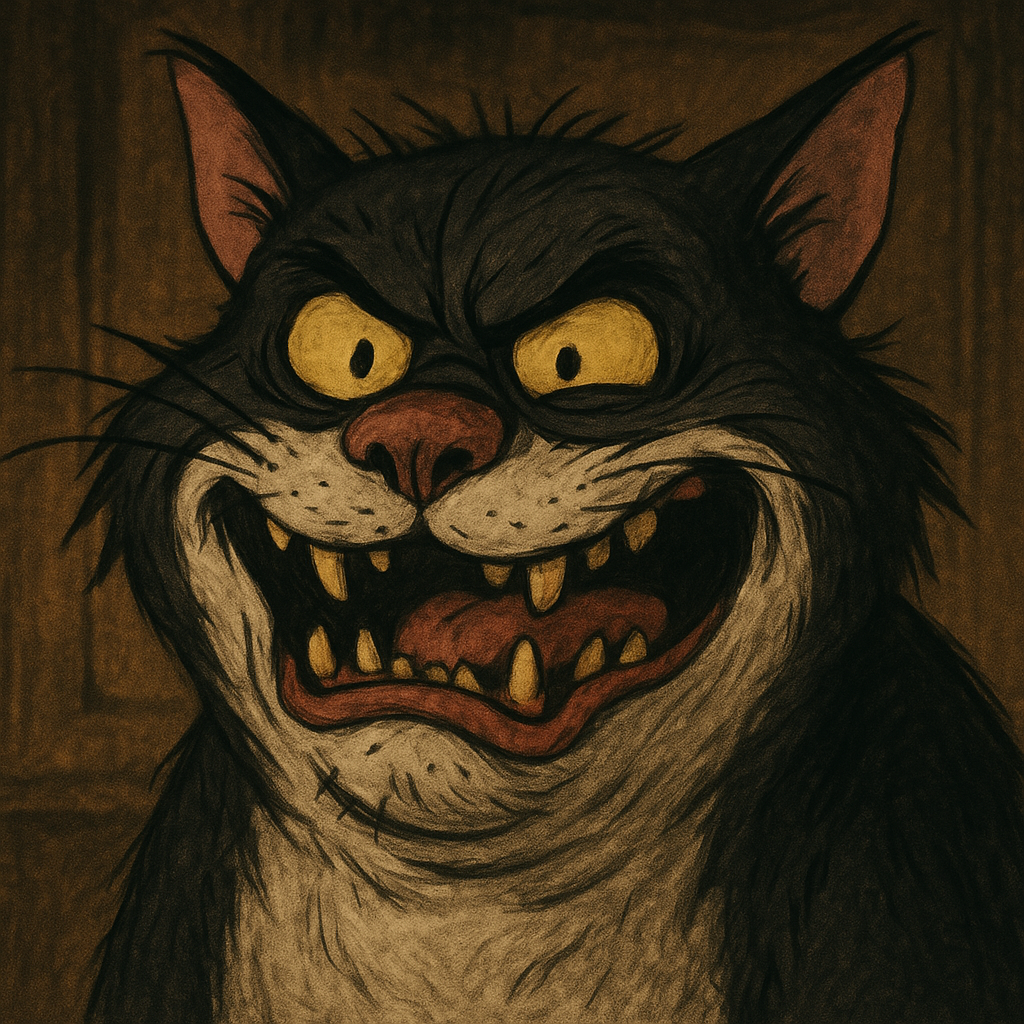

In [40]:
# 목표: 우리반 마스코트 캐릭터 만들기
prompt = """
영화에 나오는 빌런 역할 고양이 겁나 웃기고 못생기게 그려줘
"""
generate_image(prompt)